# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

## Import Statements

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [6]:
df_hh_income['Median Income'] = pd.to_numeric(df_hh_income['Median Income'], errors='coerce')
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
df_share_race_city['share_white'] = pd.to_numeric(df_share_race_city['share_white'], errors='coerce')
df_share_race_city['share_black'] = pd.to_numeric(df_share_race_city['share_black'], errors='coerce')
df_share_race_city['share_native_american'] = pd.to_numeric(df_share_race_city['share_native_american'], errors='coerce')
df_share_race_city['share_asian'] = pd.to_numeric(df_share_race_city['share_asian'], errors='coerce')
df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'], errors='coerce')
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='%Y-%m-%d')
df_fatalities['age'] = pd.to_numeric(df_fatalities['age'], errors='coerce')

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
print(f"Median Household Income: {df_hh_income.shape}")
print(f"People below poverty level: {df_pct_poverty.shape}")
print(f"People over 25 that completed high school: {df_pct_completed_hs.shape}")
print(f"Share of race by city: {df_share_race_city.shape}")
print(f"Deaths by Police: {df_fatalities.shape}")

Median Household Income: (29322, 3)
People below poverty level: (29329, 3)
People over 25 that completed high school: (29329, 3)
Share of race by city: (29268, 7)
Deaths by Police: (2535, 14)


In [8]:
print(f"Median Household Income columns: {df_hh_income.columns}")
print(f"People below poverty level columns: {df_pct_poverty.columns}")
print(f"People over 25 that completed high school columns: {df_pct_completed_hs.columns}")
print(f"Share of race by city columns: {df_share_race_city.columns}")
print(f"Deaths by Police columns: {df_fatalities.columns}")

Median Household Income columns: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
People below poverty level columns: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
People over 25 that completed high school columns: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Share of race by city columns: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Deaths by Police columns: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [9]:
print(f"Number of NaN values in median Household Income: {df_hh_income.isna().sum()}")
print(f"Number of NaN values in people below poverty level: {df_pct_poverty.isna().sum()}")
print(f"Number of NaN values in people over 25 that completed high school: {df_pct_completed_hs.isna().sum()}")
print(f"Number of NaN values in share of race by city: {df_share_race_city.isna().sum()}")
print(f"Number of NaN values in deaths by Police: {df_fatalities.isna().sum()}")

Number of NaN values in median Household Income: Geographic Area       0
City                  0
Median Income      1937
dtype: int64
Number of NaN values in people below poverty level: Geographic Area      0
City                 0
poverty_rate       201
dtype: int64
Number of NaN values in people over 25 that completed high school: Geographic Area           0
City                      0
percent_completed_hs    197
dtype: int64
Number of NaN values in share of race by city: Geographic area           0
City                      0
share_white              20
share_black              20
share_native_american    20
share_asian              20
share_hispanic           20
dtype: int64
Number of NaN values in deaths by Police: id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                  

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [10]:
df_hh_income.fillna(0, inplace=True)
df_pct_poverty.fillna(0, inplace=True)
df_pct_completed_hs.fillna(0, inplace=True)
df_share_race_city.fillna(0, inplace=True)
df_fatalities.fillna(0, inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

<Axes: xlabel='Geographic Area'>

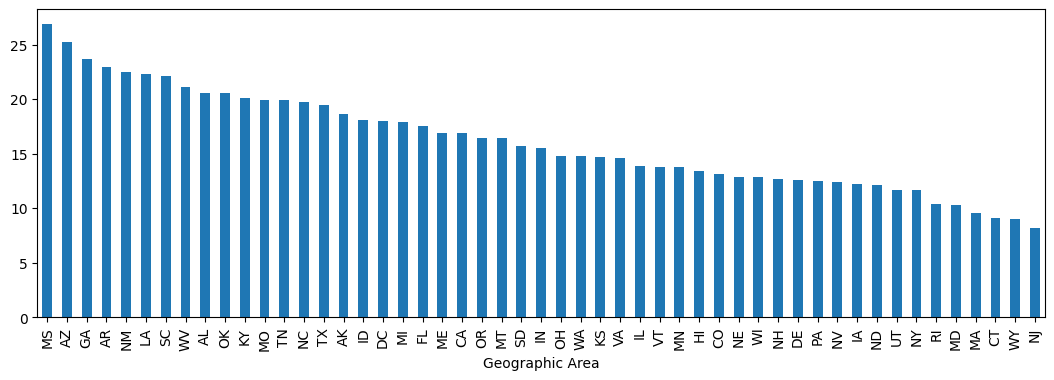

In [14]:
df_pct_poverty_copy = df_pct_poverty.copy(deep=True)
df_pct_poverty_copy.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(13, 4))

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

<Axes: xlabel='Geographic Area'>

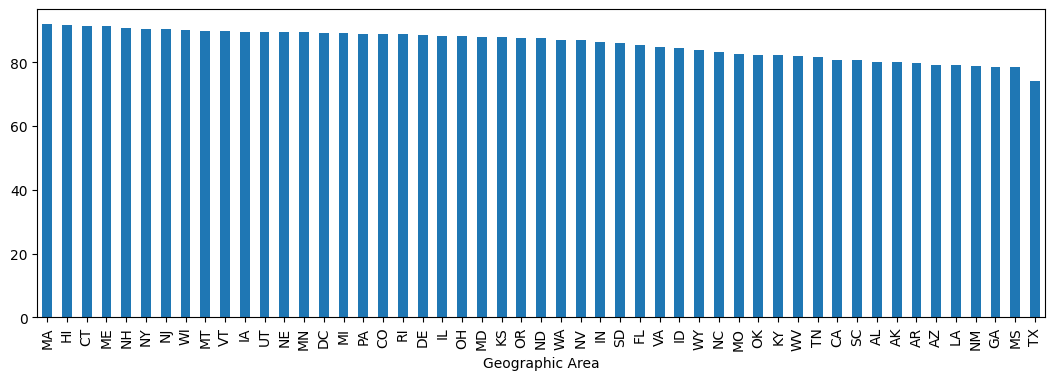

In [15]:
df_pct_completed_hs_copy = df_pct_completed_hs.copy(deep=True)
df_pct_completed_hs_copy.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(13,4))

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

<Axes: xlabel='Geographic Area'>

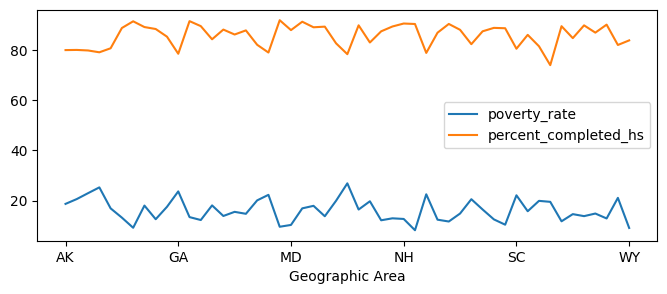

In [16]:
df_poverty_high_school = pd.merge(df_pct_poverty_copy.groupby('Geographic Area')['poverty_rate'].mean(), 
                                  df_pct_completed_hs_copy.groupby('Geographic Area')['percent_completed_hs'].mean(), 
                                  on='Geographic Area')
df_poverty_high_school.plot(kind='line', figsize=(8, 3))

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

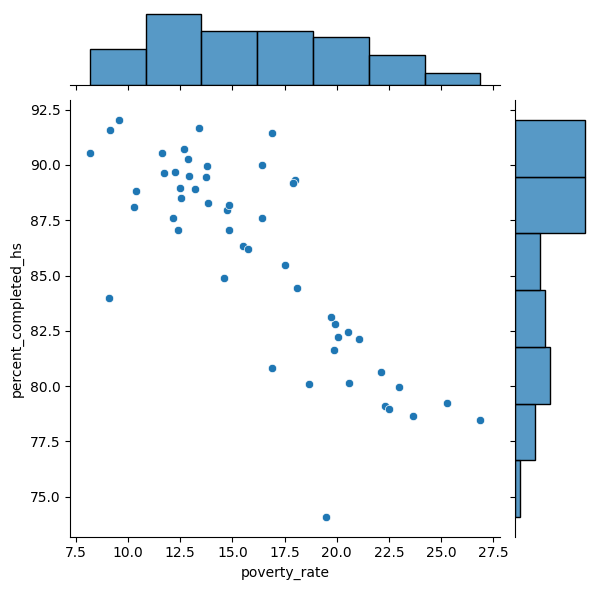

In [17]:
sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=df_poverty_high_school, kind='scatter')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

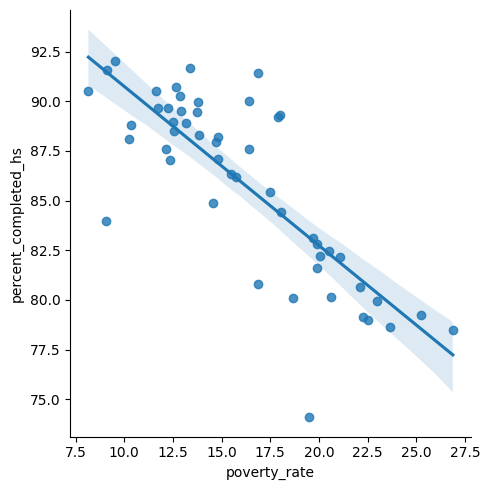

In [18]:
sns.lmplot(x='poverty_rate', y='percent_completed_hs', data=df_poverty_high_school)

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

<Axes: xlabel='Geographic area'>

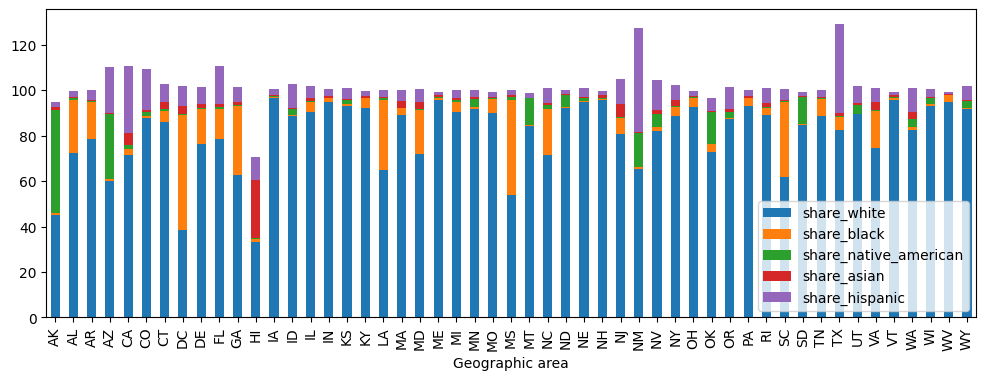

In [20]:
df_share_race_city_copy = df_share_race_city.copy(deep=True)
df_share_race_city_copy = df_share_race_city_copy.drop('City', axis=1)
df_share_race_city_copy.groupby('Geographic area').mean().plot(kind='bar', stacked=True, figsize=(12,4))

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

<Axes: ylabel='count'>

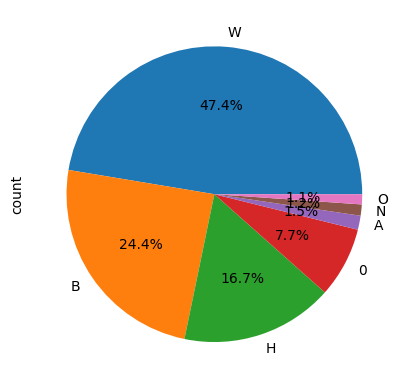

In [21]:
df_fatalities['race'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

<Axes: ylabel='count'>

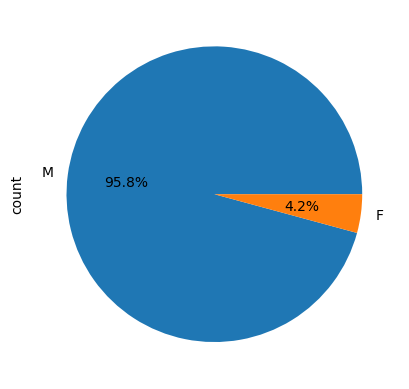

In [22]:
df_fatalities['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

<Axes: ylabel='count'>

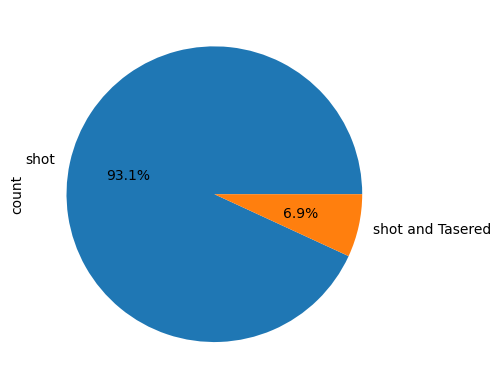

In [23]:
df_fatalities[df_fatalities['gender'] == 'M']['manner_of_death'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='count'>

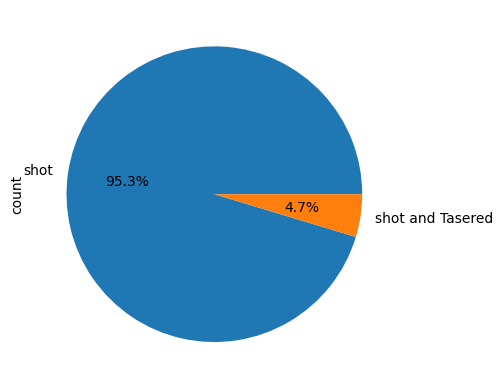

In [24]:
df_fatalities[df_fatalities['gender'] == 'F']['manner_of_death'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

<Axes: ylabel='count'>

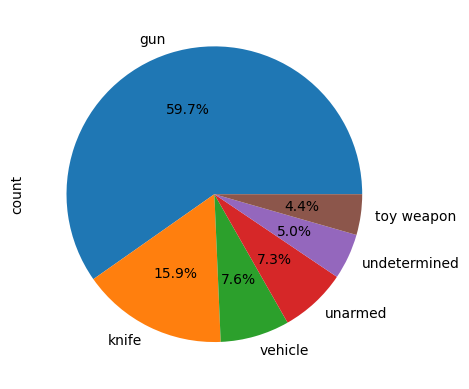

In [25]:
armed_df_fatalities = df_fatalities['armed'].value_counts()
armed_df_fatalities[armed_df_fatalities / armed_df_fatalities.sum() * 100 > 1].plot(kind='pie', autopct='%1.1f%%')

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

<Axes: ylabel='count'>

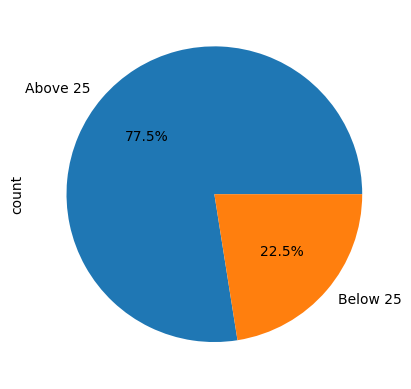

In [26]:
df_fatalities_copy = df_fatalities.copy(deep=True)
df_fatalities_copy['age_group'] = pd.cut(df_fatalities_copy['age'], bins=[0, 25, float('inf')], labels=['Below 25', 'Above 25'])
df_fatalities_copy['age_group'].value_counts().plot(kind='pie', autopct='%1.1f%%')

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

<Axes: xlabel='age', ylabel='Density'>

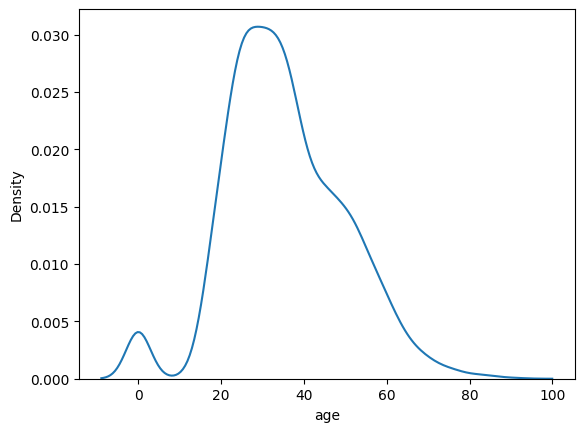

In [27]:
sns.kdeplot(data=df_fatalities['age'])

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

<Axes: xlabel='count', ylabel='race'>

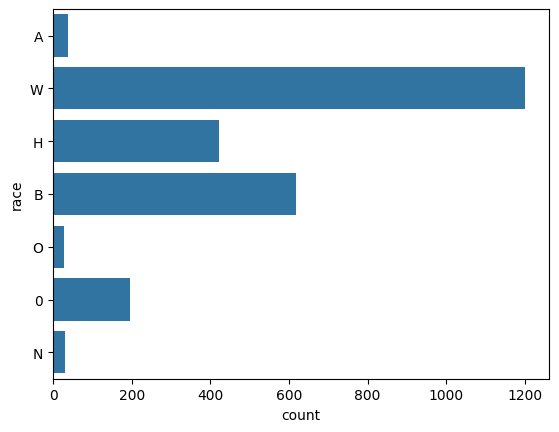

In [28]:
sns.countplot(data=df_fatalities['race'])

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

<Axes: xlabel='race'>

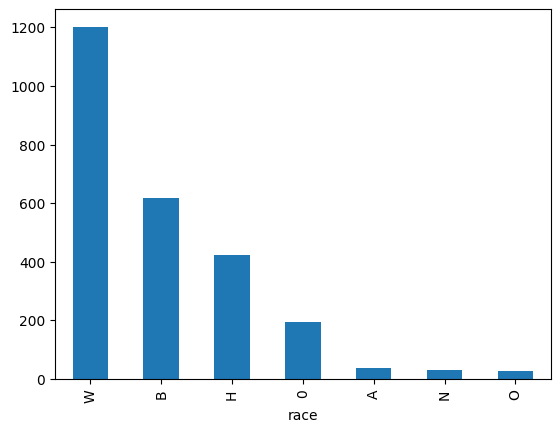

In [29]:
df_fatalities['race'].value_counts().plot(kind='bar')

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

<Axes: ylabel='count'>

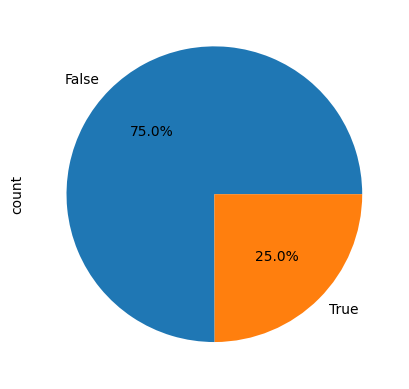

In [30]:
df_fatalities['signs_of_mental_illness'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

<Axes: ylabel='count'>

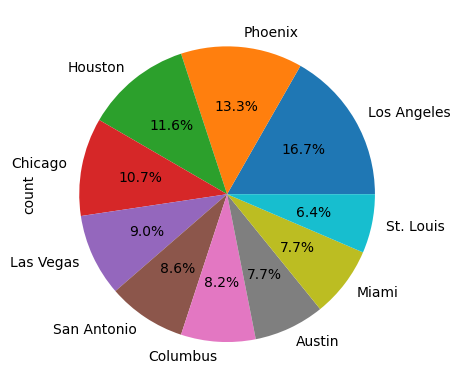

In [31]:
df_fatalities['city'].value_counts()[:10].plot(kind='pie', autopct='%1.1f%%')

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

<Axes: xlabel='city', ylabel='percentage'>

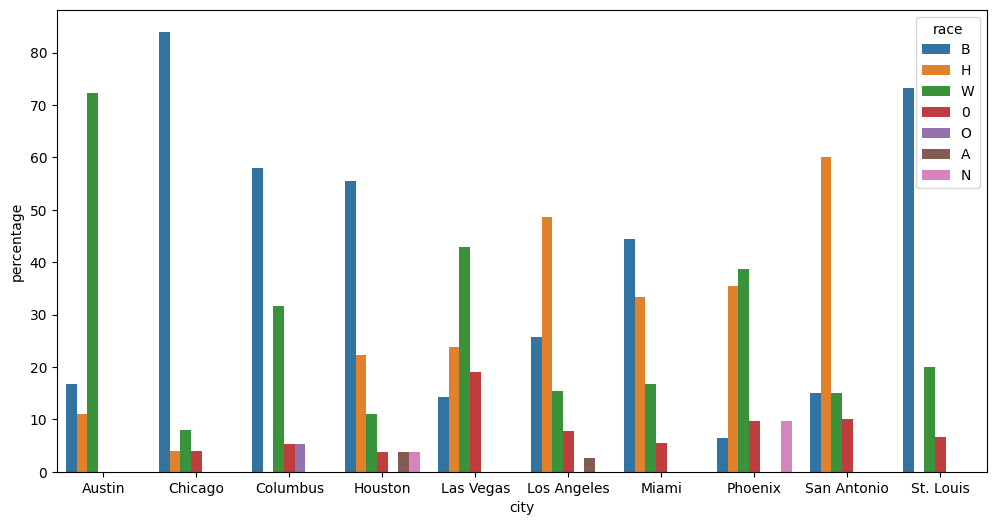

In [32]:
df_fatalities_copy = df_fatalities.copy(deep=True)
race_counts = df_fatalities_copy.groupby(['city', 'race']).size().reset_index(name='counts')
city_total_counts = race_counts.groupby('city')['counts'].sum()
top_ten_cities = city_total_counts.sort_values(ascending=False).head(10).index

race_counts_top_ten = race_counts[race_counts['city'].isin(top_ten_cities)]
percentage_col = (race_counts_top_ten['counts'] / race_counts_top_ten['city'].map(city_total_counts)) * 100
race_counts_top_ten = race_counts_top_ten.assign(percentage=percentage_col)

plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='percentage', hue='race', data=race_counts_top_ten)

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [ ]:
states = df_fatalities['state'].value_counts().reset_index()
states.columns = ['state', 'count']
fig = px.choropleth(states, locations="state", locationmode='USA-states', color='count', scope='usa', color_continuous_scale=px.colors.sequential.OrRd)
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

<Axes: xlabel='date'>

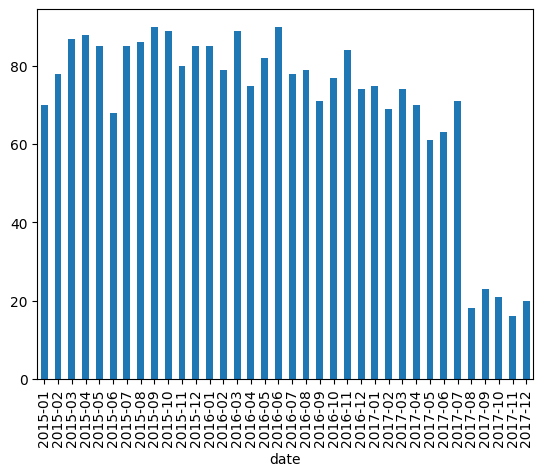

In [33]:
monthly_counts = df_fatalities['date'].dt.to_period('M').value_counts()
monthly_counts = monthly_counts.sort_index()
monthly_counts.plot(kind='bar')